C:\Users\henna\AppData\Local\Temp\ipykernel_18440\116531055.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  jumbo.drop(jumbo.columns.difference(['pt_r_t', 'from_id', 'to_id']), 1, inplace=True)


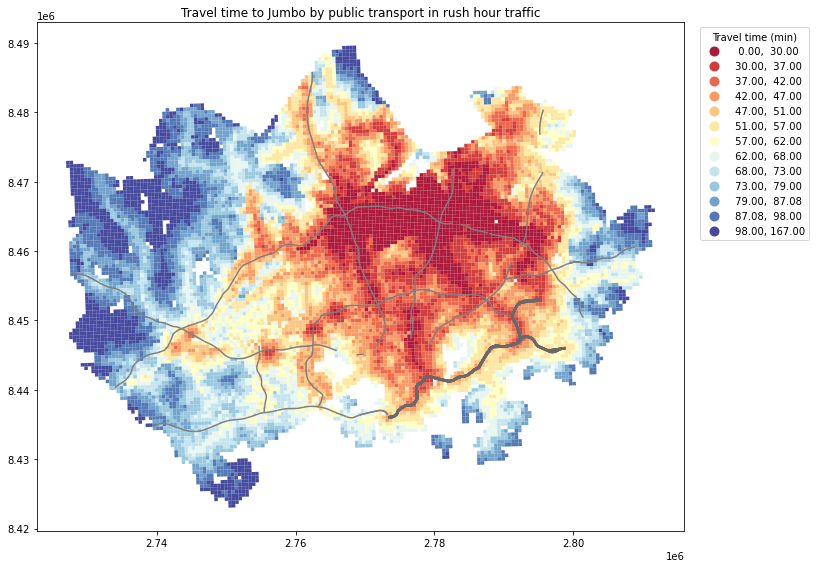

In [24]:
# importing packages
import geopandas as gpd
import pandas as pd
from pyproj import CRS
import matplotlib.pyplot as plt
import os
import numpy as np
import mapclassify

# reading datasets
jumbo = pd.read_csv('~/Documents/AutoGIS/Exercise4/exercise-4-hennaylimaa/data/TravelTimes_to_5878070_Jumbo.txt', sep = ";")
grid = gpd.read_file('~/Documents/AutoGIS/Exercise4/exercise-4-hennaylimaa/data/MetropAccess_YKR_grid_EurefFIN.shp')
roads = gpd.read_file('~/Documents/AutoGIS/exercise-5-hennaylimaa/data/dataE5/dataE5/roads.shp')
metro = gpd.read_file('~/Documents/AutoGIS/exercise-5-hennaylimaa/data/dataE5/dataE5/metro.shp')

# setting csr
grid = grid.to_crs(epsg=3857)
roads = roads.to_crs(epsg=3857)
metro = metro.to_crs(epsg=3857)
#jumbo = jumbo.to_crs(epsg=3857)

# dropping unnessessary columns and -1 value rowns
jumbo.drop(jumbo.columns.difference(['pt_r_t', 'from_id', 'to_id']), 1, inplace=True)
merged = grid.merge(jumbo, left_on='YKR_ID', right_on='from_id')
merged = merged.replace(-1, np.nan)
data = merged.dropna()

# creating map
fig, ax = plt.subplots(figsize=(12,8))

# plot the data of traveling time by fast cycling
data.plot(ax=ax, column="pt_r_t", linewidth=0.03, cmap="RdYlBu", scheme="quantiles", k=13, alpha=0.9, legend=True)

# Re-position the legend and set a title
ax.set_title('Travel time to Jumbo by public transport in rush hour traffic')

ax.get_legend().set_bbox_to_anchor((1.2,1))
ax.get_legend().set_title("Travel time (min)")

# add road on top of previous map
roads.plot(ax=ax, color="grey", linewidth=1.5)
# Add metro on top of the previous map
metro.plot(ax=ax, color="dimgrey", linewidth=2.5)

plt.tight_layout()

output_fig = r'C:\Users\henna\Documents\AutoGIS\exercise-5-hennaylimaa\jumbo_by_pt.png'
jaaha = fig.savefig(output_fig)
